In [10]:
from neo4j import GraphDatabase, basic_auth
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import calendar

In [2]:
load_dotenv()
DB_HOST = os.getenv("NEO4J_HOST")
DB_PORT = os.getenv("NEO4J_PORT")
DB_USER = os.getenv("NEO4J_USER")
DB_PASS = os.getenv("NEO4J_PASS")

In [3]:
driver = GraphDatabase.driver(f"bolt://{DB_HOST}:{DB_PORT}", auth=basic_auth(DB_USER, DB_PASS))
driver

In [7]:
query = """
    MATCH (n:Track)
    RETURN
        CASE n.month
            WHEN "1" THEN "January"
            WHEN "2" THEN "February"
            WHEN "3" THEN "March"
            WHEN "4" THEN "April"
            WHEN "5" THEN "May"
            WHEN "6" THEN "June"
            WHEN "7" THEN "July"
            WHEN "8" THEN "August"
            WHEN "9" THEN "September"
            WHEN "10" THEN "October"
            WHEN "11" THEN "November"
            WHEN "12" THEN "December"
            ELSE "Unknown"
        END AS Month,
        COUNT(*) AS Count
"""
with driver.session() as session:
    result = session.run(query)
    data = [(d["Month"], d["Count"]) for d in result.data()]


In [8]:
data

[('December', 1108712),
 ('June', 1245461),
 ('April', 1303621),
 ('Unknown', 9199531),
 ('September', 1393582),
 ('October', 1559485),
 ('January', 1121212),
 ('July', 1092229),
 ('November', 1399253),
 ('August', 1125747),
 ('February', 1120478),
 ('March', 1355420),
 ('May', 1299369)]

In [11]:
month_order = list(calendar.month_name)[1:]  # Get month names (index 0 is empty)

def sort_key(item):
    month, _ = item
    if month == "Unknown":
        return 13  # Put 'Unknown' at the end (after December)
    try:
        return month_order.index(month)
    except ValueError: # handle the case the month is not found
        return 13 # put at the end

data.sort(key=sort_key)

data

[('January', 1121212),
 ('February', 1120478),
 ('March', 1355420),
 ('April', 1303621),
 ('May', 1299369),
 ('June', 1245461),
 ('July', 1092229),
 ('August', 1125747),
 ('September', 1393582),
 ('October', 1559485),
 ('November', 1399253),
 ('December', 1108712),
 ('Unknown', 9199531)]

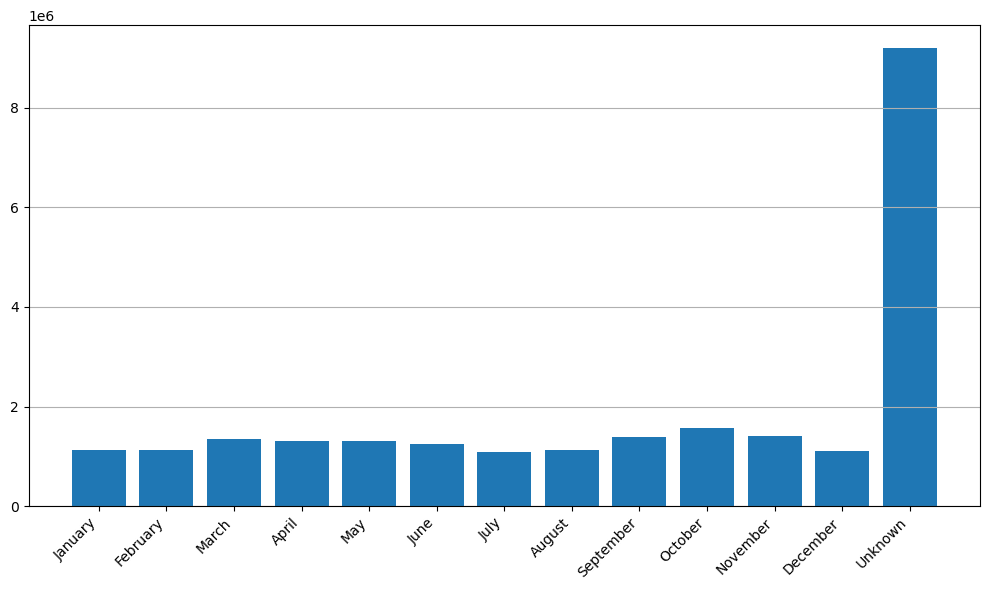

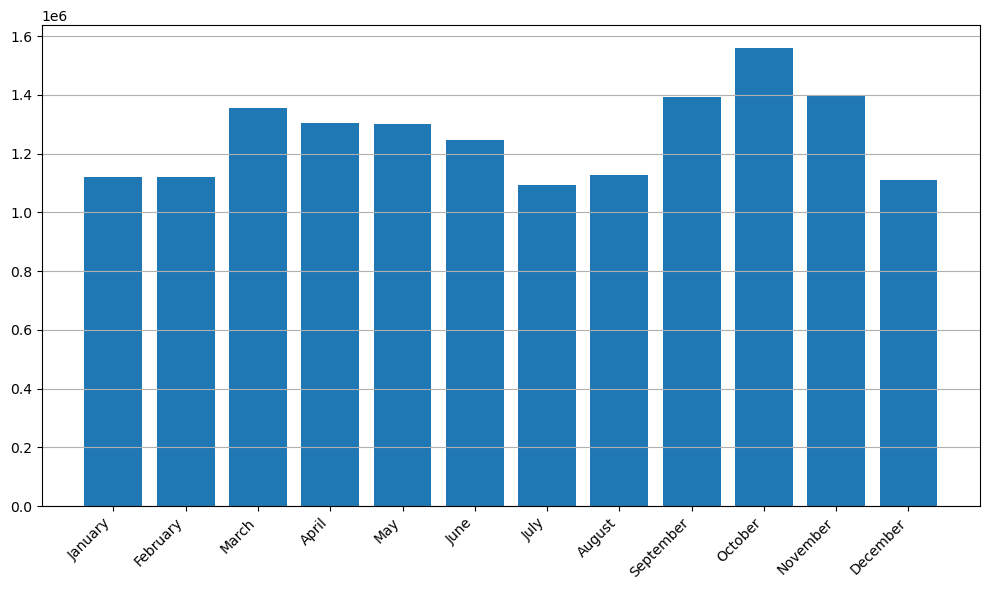

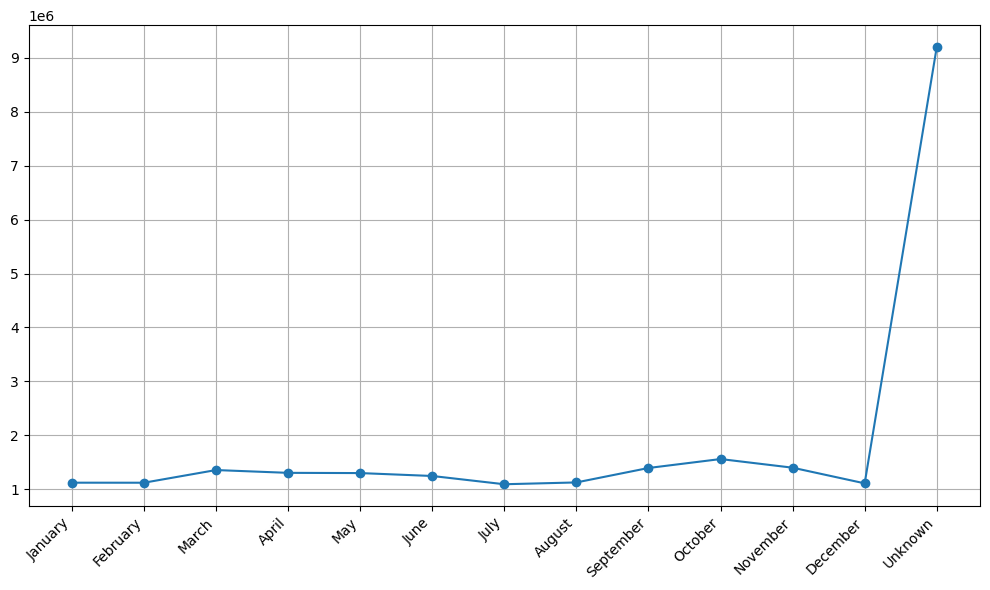

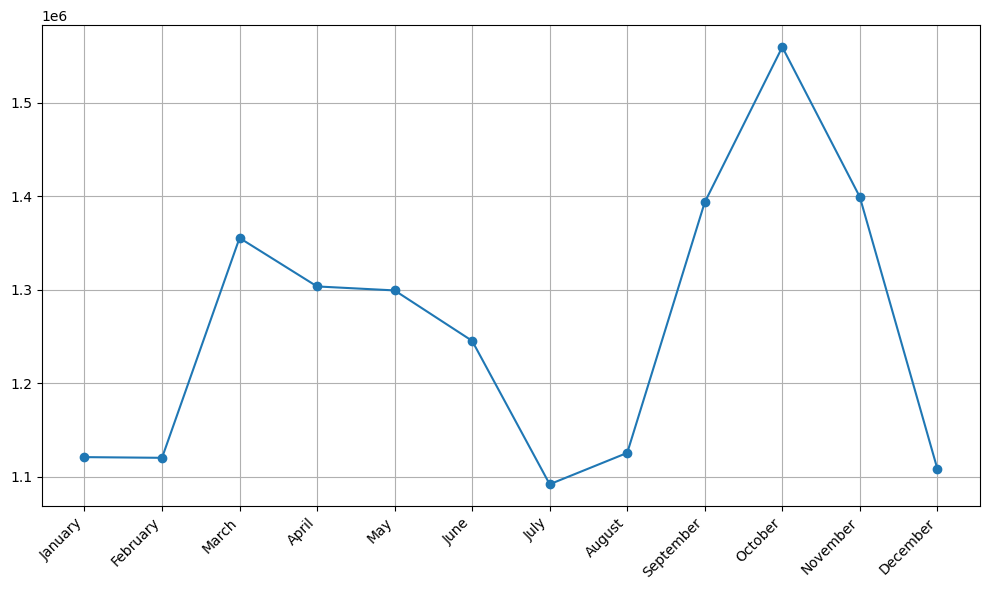

In [23]:
data_with_unknown = data
data_no_unknown = [item for item in data if item[0] != 'Unknown']

# --- Plotting functions (to avoid repeating code) ---

def create_plot(data, title, plot_type):
    months, counts = zip(*data)
    plt.figure(figsize=(10, 6))

    if plot_type == "bar":
        plt.bar(months, counts)
        plt.grid(axis="y")
    elif plot_type == "line":
        plt.plot(months, counts, marker='o')
        plt.grid(True)
    else:
        raise ValueError("Invalid plot_type. Choose 'bar' or 'line'.")

    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# --- Create the four plots ---

create_plot(data_with_unknown, "Month vs. Count (Bar Plot with 'Unknown')", "bar")
create_plot(data_no_unknown, "Month vs. Count (Bar Plot without 'Unknown')", "bar")
create_plot(data_with_unknown, "Month vs. Count (Line Plot with 'Unknown')", "line")
create_plot(data_no_unknown, "Month vs. Count (Line Plot without 'Unknown')", "line")


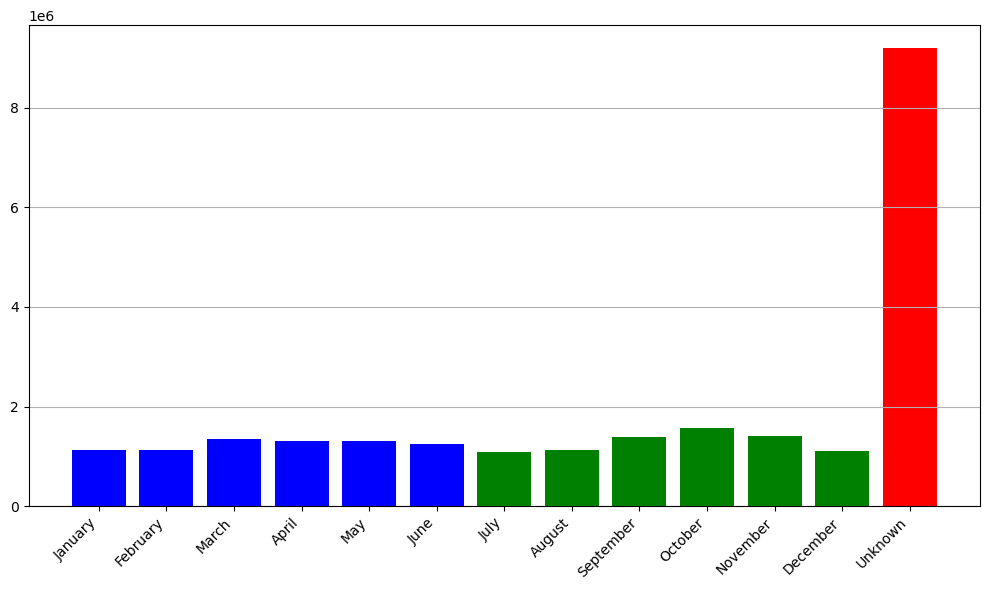

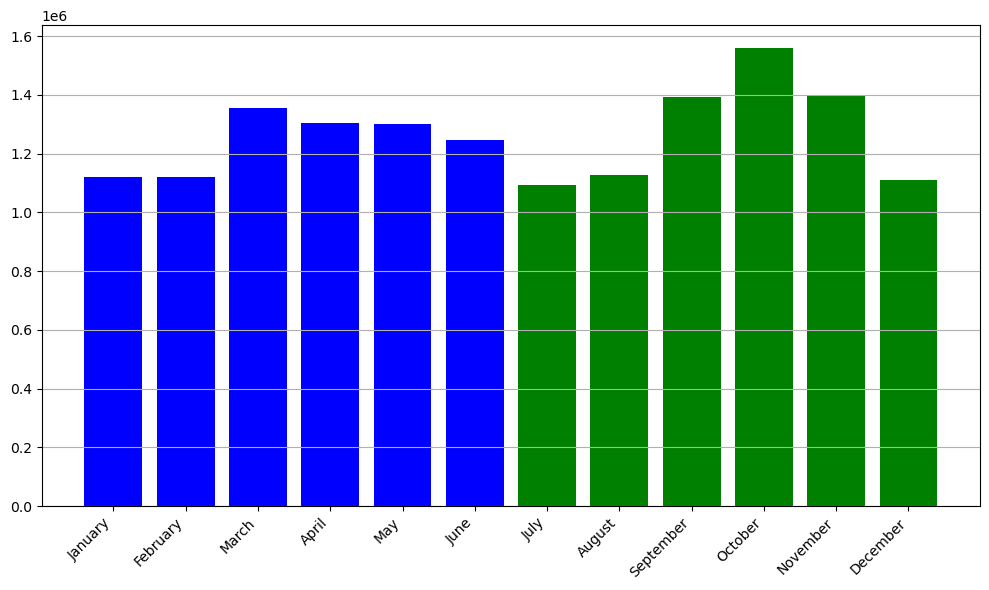

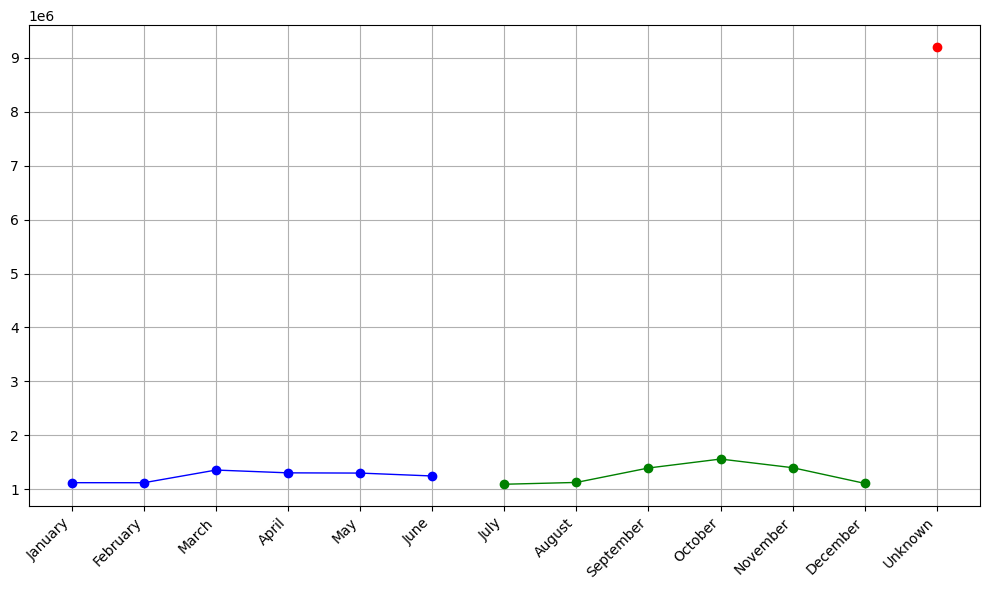

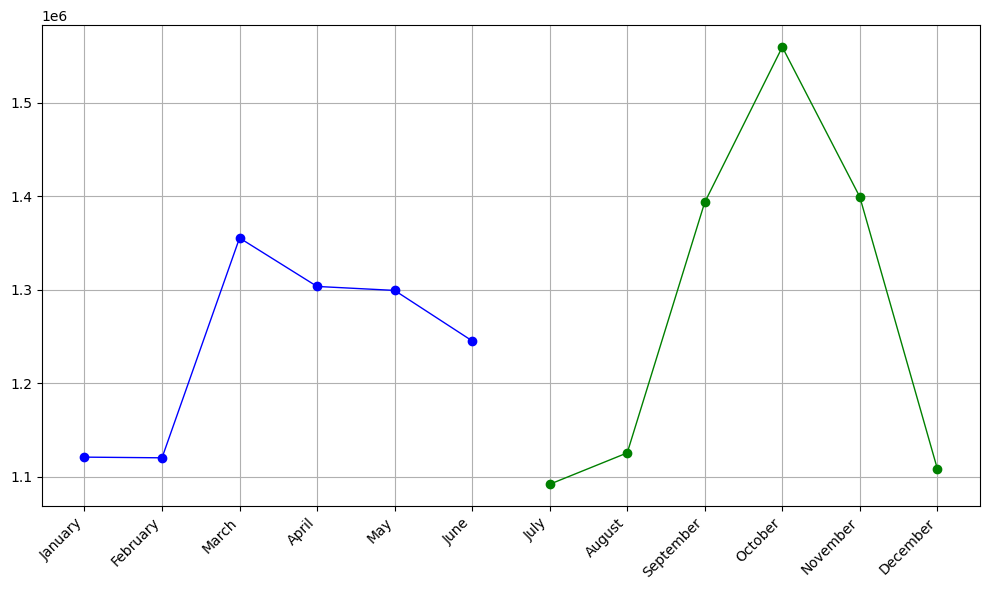

In [24]:
data_with_unknown = data
data_no_unknown = [item for item in data if item[0] != 'Unknown']

# --- Plotting functions (to avoid repeating code) ---

def create_plot(data, plot_type):
    months, counts = zip(*data)
    plt.figure(figsize=(10, 6))

    colors = list()
    for month in months:
        if month in month_order[:6]:  # Jan to June
            colors.append('blue')
        elif month == 'Unknown':
            colors.append('red')
        else:
            colors.append('green')  # July to December

    if plot_type == "bar":
        plt.bar(months, counts, color=colors)
        plt.grid(axis="y")
    elif plot_type == "line":
        # Corrected line plot drawing:
        plt.plot(months[:6], counts[:6], linestyle='-', color='blue', linewidth=1)
        if "Unknown" in months:
            plt.plot(months[6:-1], counts[6:-1], linestyle='-', color='green', linewidth=1)
        else:
            plt.plot(months[6:], counts[6:], linestyle='-', color='green', linewidth=1)
        for i, (month, count) in enumerate(zip(months, counts)):
            plt.plot(month, count, marker='o', color=colors[i])  # Individual points
        plt.grid(True)


    else:
        raise ValueError("Invalid plot_type. Choose 'bar' or 'line'.")

    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# --- Create the four plots ---

create_plot(data_with_unknown, "bar")
create_plot(data_no_unknown, "bar")
create_plot(data_with_unknown, "line")
create_plot(data_no_unknown, "line")
